## Step 1: Import Required Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)

## Step 2: Load Cleaned Dataset

In [2]:
# Load cleaned dataset
df = pd.read_csv("cleaned_customer_churn.csv")

# Preview data
df.head()

,CustomerID,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn
0,c00001,6,64,1540,one year,credit card,no,1,0
1,c00002,21,113,1753,month-to-month,electronic check,yes,1,0
2,c00003,27,31,1455,two year,credit card,no,1,0
3,c00004,53,29,7150,month-to-month,electronic check,no,1,0
4,c00005,16,185,1023,one year,electronic check,no,1,0


## Step 3: Dataset Overview

In [3]:
# Dataset shape
df.shape

(500, 9)

In [4]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        500 non-null    object
 1   Tenure            500 non-null    int64 
 2   MonthlyCharges    500 non-null    int64 
 3   TotalCharges      500 non-null    int64 
 4   Contract          500 non-null    object
 5   PaymentMethod     500 non-null    object
 6   PaperlessBilling  500 non-null    object
 7   SeniorCitizen     500 non-null    int64 
 8   Churn             500 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 35.3+ KB


In [5]:
# Summary statistics
df.describe()

,Tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Churn
count,500.000000,500.000000,500.000000,500.000000,500.0
mean,36.532000,113.636000,4237.882000,0.498000,0.0
std,20.667057,51.799903,2260.619837,0.500497,0.0
min,1.000000,20.000000,159.000000,0.000000,0.0
25%,19.000000,67.000000,2237.250000,0.000000,0.0
50%,37.000000,115.000000,4182.500000,0.000000,0.0
75%,54.000000,158.000000,6266.750000,1.000000,0.0
max,71.000000,199.000000,7992.000000,1.000000,0.0


In [7]:
df.columns

Index(['CustomerID', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'Contract',
       'PaymentMethod', 'PaperlessBilling', 'SeniorCitizen', 'Churn'],
      dtype='object')

## Step 4: Target Variable Analysis (Churn)

In [9]:
# Churn distribution
df['Churn'].value_counts()

Churn
0    500
Name: count, dtype: int64

In [11]:
# Churn percentage
df['Churn'].value_counts(normalize=True) * 100

Churn
0    100.0
Name: proportion, dtype: float64

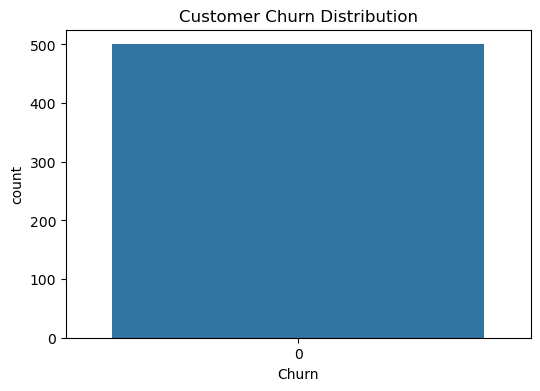

In [12]:
# Visualize churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Distribution")
plt.show()

## Step 5: Univariate Analysis (Numerical Features)

In [13]:
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['Tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Churn'], dtype='object')

## Histograms

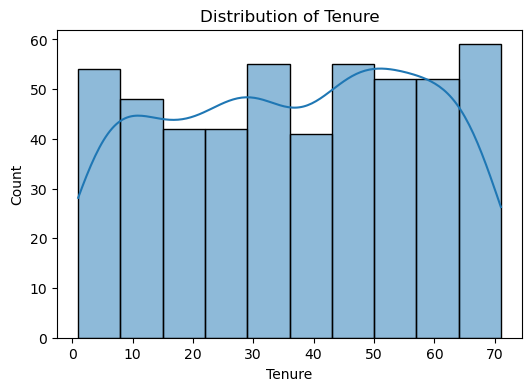

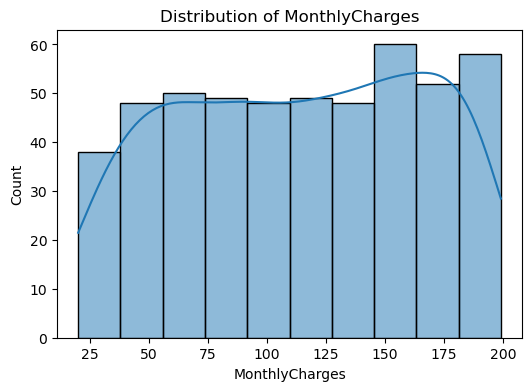

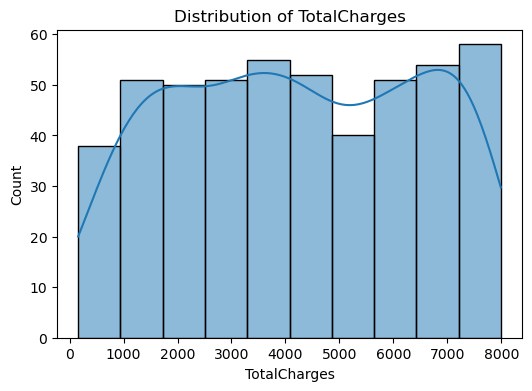

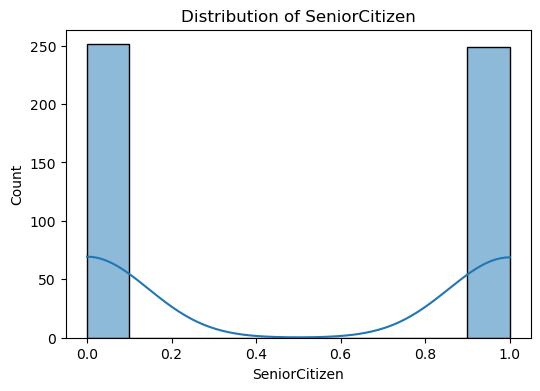

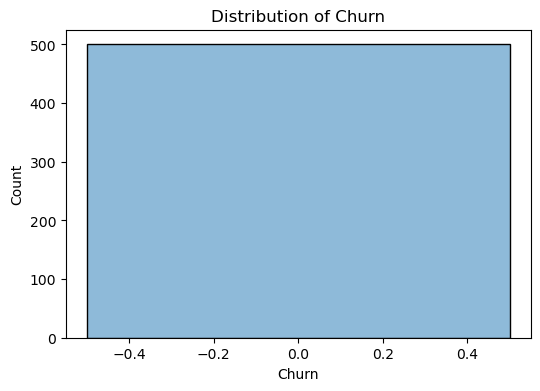

In [15]:
import warnings
# Suppress all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

## Step 6: Univariate Analysis (Categorical Features)

In [16]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['CustomerID', 'Contract', 'PaymentMethod', 'PaperlessBilling'], dtype='object')

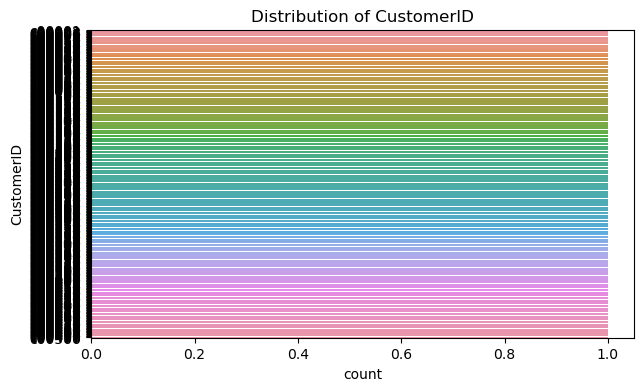

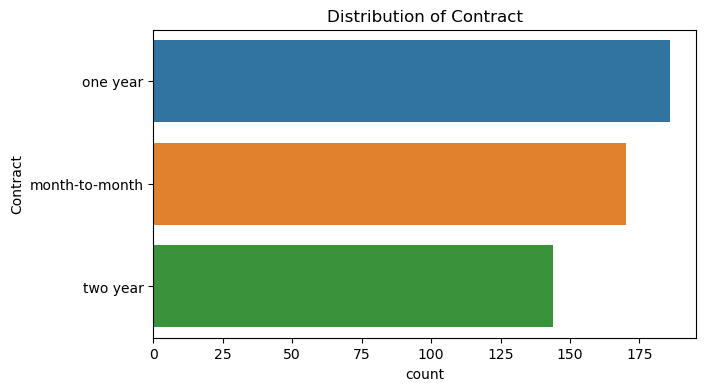

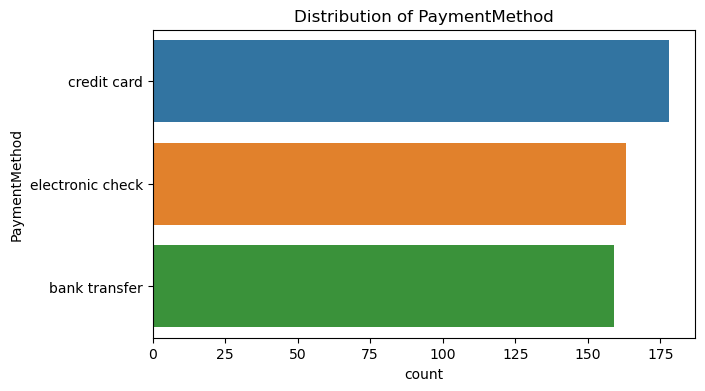

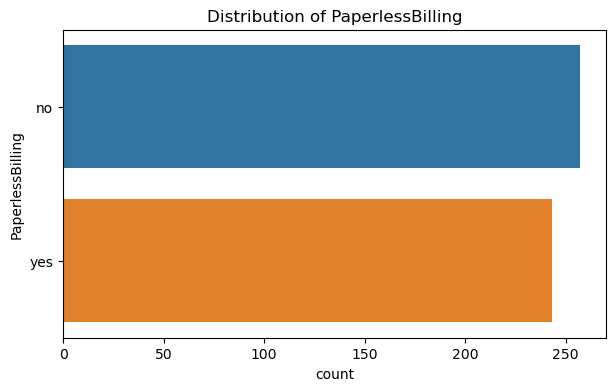

In [17]:
for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(y=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()

## Step 7: Bivariate Analysis – Churn vs Numerical Features

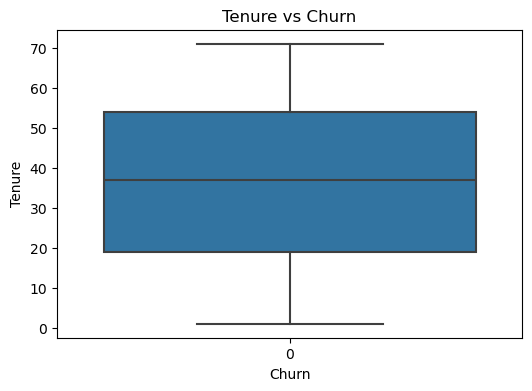

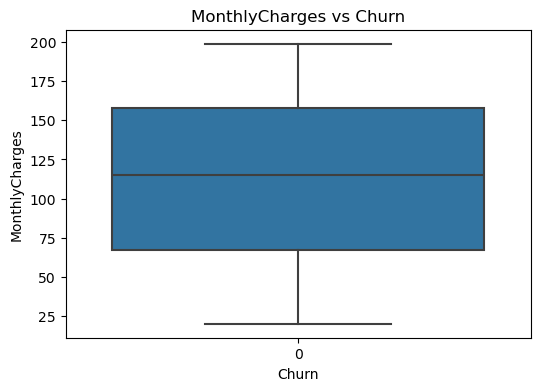

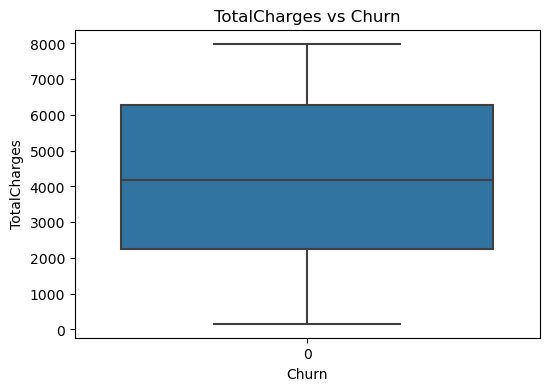

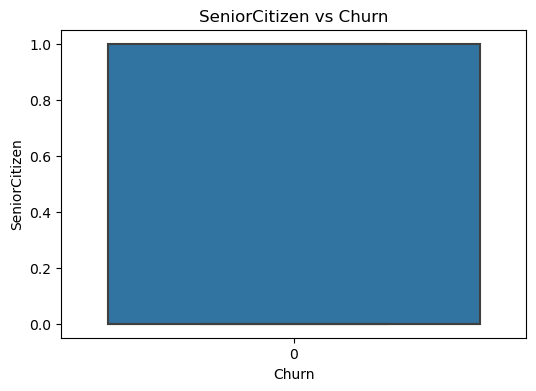

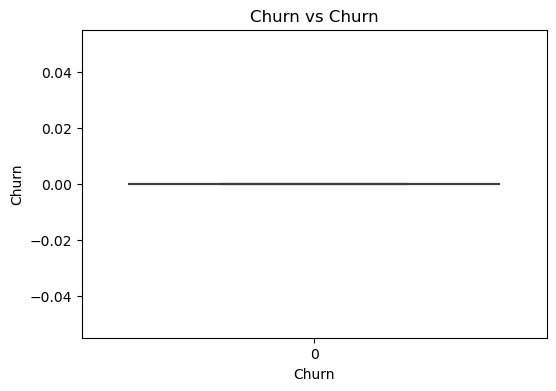

In [20]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()

## Step 8: Bivariate Analysis – Churn vs Categorical Features

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


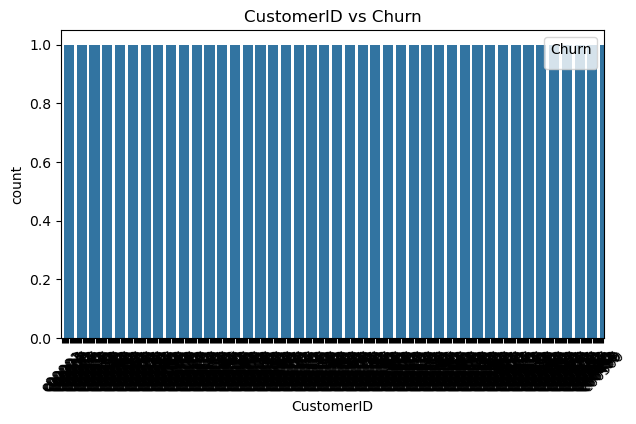

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


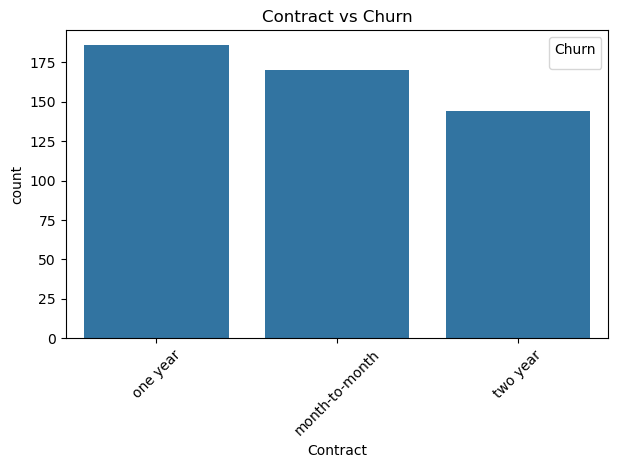

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


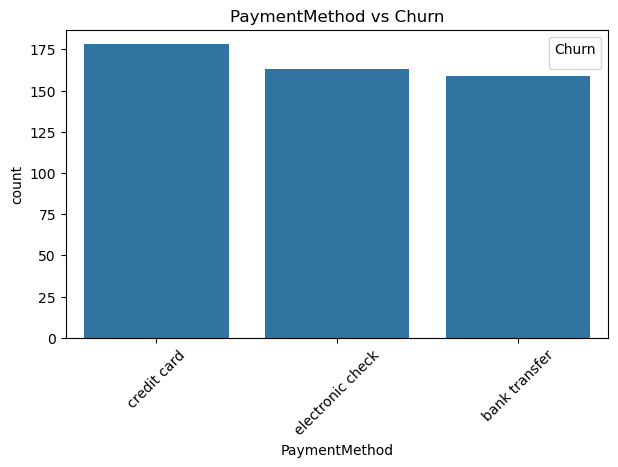

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


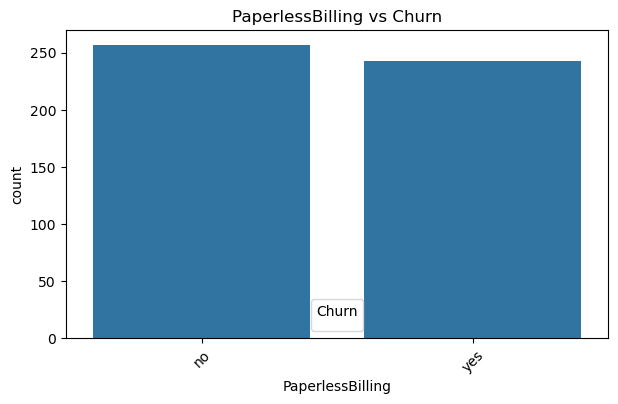

In [22]:
for col in cat_cols:
    if col != 'Churn':
        plt.figure(figsize=(7,4))
        sns.countplot(x=col, hue='Churn', data=df)
        plt.title(f"{col} vs Churn")
        plt.xticks(rotation=45)
        plt.show()

## Step 9: Correlation Analysis

In [23]:
# Correlation matrix
corr = df[num_cols].corr()

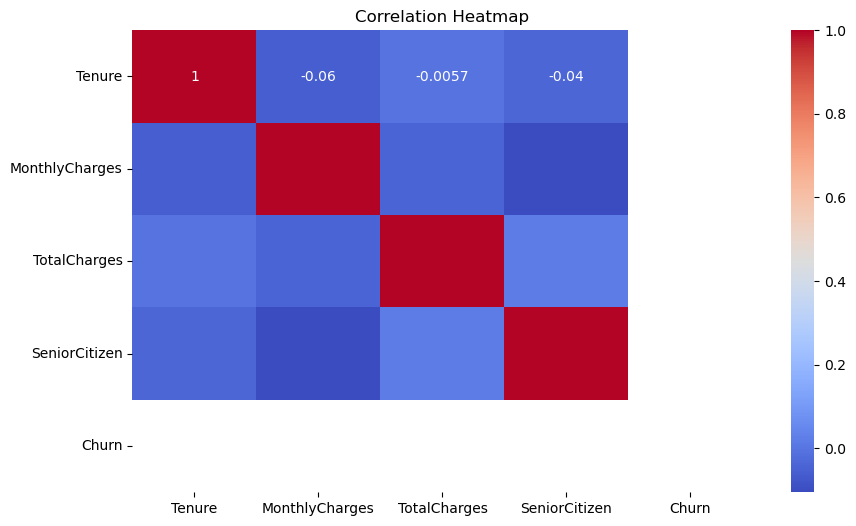

In [24]:
# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Step 10: Key Insights Summary

### Key EDA Insights
- Customers with shorter tenure show higher churn
- Month-to-month contracts have the highest churn rate
- Higher monthly charges are associated with churn
- Long-term contracts show better retention
- Electronic check payment method shows higher churn

## Step 11: Save EDA-Ready Dataset

In [25]:
# Save dataset after EDA (if needed)
df.to_csv("eda_customer_churn.csv", index=False)